In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak on Windows with MKL.*")

error = []
silhouette_scores = []
ks = [i for i in range(2, 20)]
for k in ks:
    # Load Data
    data = pd.read_csv('../data/processed/cleaned/metro_market_tracker_cleaned.csv')
    # locations = pd.read_csv('./data/processed/locations/locations.csv')

    # Process Data
    data = data[data['property_type'] == 'All Residential']
    dates = data['period_end'].unique()
    dates.sort()
    data = data[data['period_end'] == dates[-1]]
    numeric_data = data.select_dtypes(include=['float64'])
    regions = data['region'].str.replace(' metro area', '')

    # Perform PCA
    scaled_data = StandardScaler().fit_transform(numeric_data)
    pca = PCA(n_components=2)
    pca.fit(scaled_data.T)
    components = pca.components_

    # Perform K-Means
    kmeans = KMeans(n_clusters=k, random_state=6242)
    kmeans.fit(components.T)
    
    error.append(round(kmeans.inertia_, 4))
    silhouette_scores.append(round(silhouette_score(components.T, kmeans.labels_), 4))

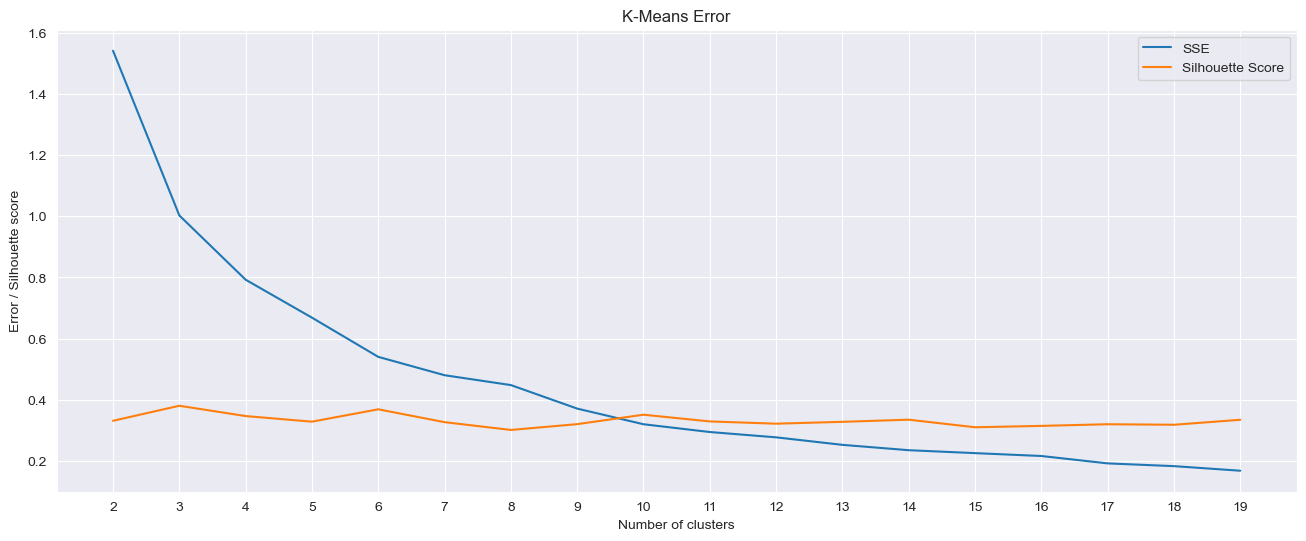

In [3]:
plt.figure(figsize=(16, 6))
plt.plot(ks, error, label='SSE')
plt.plot(ks, silhouette_scores, label='Silhouette Score')
plt.title('K-Means Error')
plt.xlabel('Number of clusters')
plt.ylabel('Error / Silhouette score')
plt.legend(loc='best')
plt.xticks(ks)
plt.show()

In [4]:
best_k = ks[silhouette_scores.index(max(silhouette_scores))]
best_k_index = ks.index(best_k)
print(f'Max Silhouette Score is {max(silhouette_scores)} at k={best_k}')
print(f'The corresponding SSE for K={best_k} is {error[best_k_index]}')

Max Silhouette Score is 0.3799 at k=3
The corresponding SSE for K=3 is 1.0031
